# Research Notebook 2
## Debbie Zhou
## Date: 02-03-2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

Graphed the analytical solutions for figures 6 and 7 in the paper: "Self-Scattering for Dark Matter with an Excited State" [1]

## Motivation:

The project's overall goal is to find the cross section to simulate cold dark matter halo behavior in 2D. For this part of the project, my lab partner coded the 2D numerical solution while I coded the analytical solution according to the paper. 

This is so we can compare the analytical solution with the numerical to confirm accuracy. 

 <span style="color: red;"> Good! </span>

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

Figure 6 code: 
I took Equations 3.10 (Elastic Scattering) and 3.12 (Inelastic Scattering), anaylytical solutions for their dark matter scattering simulations from [1] and graphed them on the y-axis against $\epsilon_\phi$ values between 0 and 1 in the x-axis. $\epsilon_\delta$ is set to zero.

Here are the equations used to generate the graphs: 

*Figure 1: Equation 3.10, equation for elastic scattering*
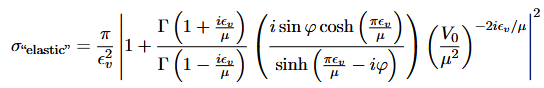

*Figure 2: Equation 3.12, equationfor inelastic scattering*
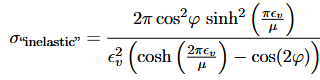

```
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy . special import lambertw

# Constants
gama = 0.577
epsilon_delta = 0 
a = 0.01

# Define v0, mu and phi
 
def compute_v0(b, r_M):
    return np.exp(b * (0.5 + 0.5 * np.sqrt(1 + (4 / (b * r_M))))) / r_M

def mu(b, r_M):
    return b * (0.5 + 0.5 * np.sqrt(1 + (4 / (b * r_M))))

def phi (b):
    return np.sqrt(2 * np.pi / b)

# Cross Section Definitions

def sigma_elastic_delta_zero (a, mu, phi, V0): # Eqn 3.10
    term1 = gamma(1 + (1j * a) / mu)
    term2 = gamma(1 - (1j * a) / mu)
    trig_num = 1j * np.sin(phi) *np.cosh(np.pi * a / mu)
    trig_den = np.sinh( (np.pi * a / mu) - (1j * phi))

    sigma = np.pi/(a **2) * np.abs( 1 + (term1/term2) * (trig_num/trig_den) * ( V0 / mu**2)**(-2 * 1j * a * mu))

    return sigma

def sigma_inelastic_delta_zero(phi, a, mu): # Eqn 3.12
    sinh_term = np.sinh(np.pi * a/ mu)
    cosh_term = np.cosh(2 * np.pi * a / mu)
    cos_term = np.cos(2 * phi)

    sigma = 2 * np.pi * (np.cos(phi)**2) * (sinh_term**2) / ((a**2) * (cosh_term - cos_term))
    
    return sigma

# Function for calculating r_M

def calculate_matching_radius(b, epsilon_delta):
    epsilon = np.maximum(epsilon_delta**2 / 2, b**2)

    radius = 1 / b * lambertw(b / epsilon)
    return radius

# Make values to use in calculations

b = np.linspace(0.001, 1, 10**5)
r_M_values = calculate_matching_radius(b, epsilon_delta)

mu_values = mu(b, r_M_values)
V0_values = compute_v0(b, r_M_values)
phi_values = phi (b)

# Compute scattering cross-section

eqn10_sigma_elastic_values = sigma_elastic_delta_zero (a, mu_values, phi_values, V0_values)
eqn12_sigma_inelastic_values = sigma_inelastic_delta_zero(phi_values, a, mu_values)

# Graph
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

label_fontsize = 15

# Plot 1: Elastic Scattering
axes[0].loglog(b, eqn10_sigma_elastic_values)
axes[0].set_xlabel(r'$\epsilon_\phi$', fontsize=label_fontsize)
axes[0].set_ylabel(r'$\sigma$', fontsize=label_fontsize)
axes[0].set_title('"Elastic" Scattering')
axes[0].grid(True)

# Plot 2: Inelastic Scattering
axes[1].loglog(b, eqn12_sigma_inelastic_values)
axes[1].set_xlabel(r'$\epsilon_\phi$', fontsize=label_fontsize)
axes[1].set_ylabel(r'$\sigma$', fontsize=label_fontsize)
axes[1].set_title('"Inelastic" Scattering')
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
```

The resulting graph is the follwoing: 

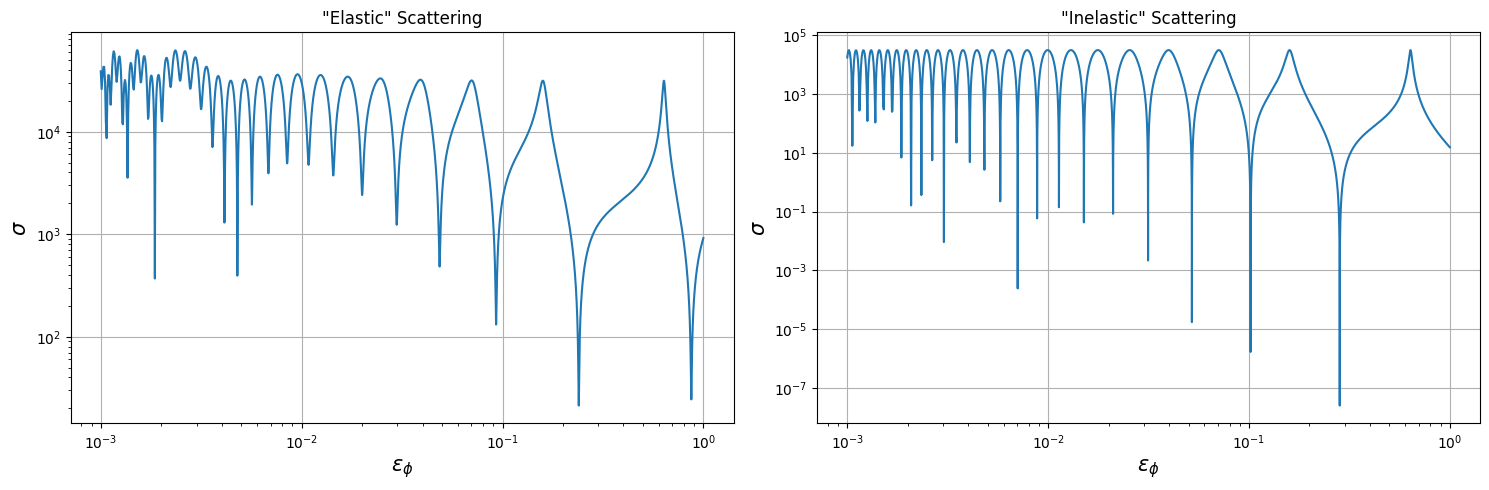
*Figure 3: Analytical solution of Equations 3.10 and 3.12 respectively, showing elastic and inelastic scattering models of dark matter.*

Figure 7 code: 
I took equation 3.22 from [1] and graphed it on a log scale graph against $\epsilon_\phi$ values between 0 and 1. Variations are graphed with $\epsilon_\delta$ with values 0, 0.1, and 0.3.

*Figure 4: Equation 3.22*
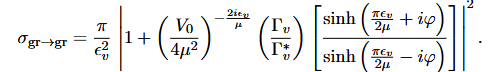

```
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy . special import lambertw

# Constants

epsilon_delta1 = 0
epsilon_delta2 = 0.01
epsilon_delta3 = 0.03
a = 0.001

# Define v0, mu and phi
 
def compute_v0(b, r_M):
    return np.exp(b * (0.5 + 0.5 * np.sqrt(1 + (4 / (b * r_M))))) / r_M

def mu(b, r_M):
    return b * (0.5 + 0.5 * np.sqrt(1 + (4 / (b * r_M))))

def phi (b):
    return np.sqrt(2 * np.pi / b)

# Functions

def Gamma_v_eqn21(a, mu): # Eqn 3.21
    term1 = gamma(1 + (1j*a/mu))
    term2 = gamma((1j*a/(2*mu)) + (1/2))

    return term1*term2**2

def sigma_gr_gr_t_limit(phi, mu, V0, a, Gamma_v, Gamma_star_v): #eqn 3.22
   trig_num = np.sinh((np.pi*a/(2*mu)) + 1j*phi)
   trig_den = np.sinh((np.pi*a/(2*mu)) - 1j*phi)
   
   return np.pi/(a **2) * np.abs( 1 + ( V0 / (4*mu**2))**(-2 * 1j * a * mu) * (Gamma_v/Gamma_star_v) * (trig_num/trig_den)) **2

# Function for calculating r_M

def calculate_matching_radius(b, epsilon_delta):
    epsilon = np.maximum(epsilon_delta**2 / 2, b**2)

    radius = 1 / b * lambertw(b / epsilon)
    return radius

# Make values to use in calculations

b = np.linspace(0.001, 1, 10**5)

r_M_values1 = calculate_matching_radius(b, epsilon_delta1)
r_M_values2 = calculate_matching_radius(b, epsilon_delta2)
r_M_values3 = calculate_matching_radius(b, epsilon_delta3)

mu_values1 = mu(b, r_M_values1)
mu_values2 = mu(b, r_M_values2)
mu_values3 = mu(b, r_M_values3)

V0_values1 = compute_v0(b, r_M_values1)
V0_values2 = compute_v0(b, r_M_values2)
V0_values3 = compute_v0(b, r_M_values3)

phi_values = phi (b)

# Compute Gamma_v and its complex conjugate

Gamma_delta_1 = Gamma_v_eqn21(a, mu_values1)
Gamma_star_delta_1 = np.conj(Gamma_delta_1)

Gamma_delta_2 = Gamma_v_eqn21(a, mu_values2)
Gamma_star_delta_2 = np.conj(Gamma_delta_2)

Gamma_delta_3 = Gamma_v_eqn21(a, mu_values3)
Gamma_star_delta_3 = np.conj(Gamma_delta_3)

# Compute sigma 
sigma_1 = sigma_gr_gr_t_limit(phi_values, mu_values1, V0_values1, a, Gamma_delta_1, Gamma_star_delta_1)
sigma_2 = sigma_gr_gr_t_limit(phi_values, mu_values2, V0_values2, a, Gamma_delta_2, Gamma_star_delta_2)
sigma_3 = sigma_gr_gr_t_limit(phi_values, mu_values3, V0_values3, a, Gamma_delta_3, Gamma_star_delta_3)

# Graph

plt.figure(figsize=(15, 7))

plt.loglog(b, sigma_1, label=r'$\epsilon_\delta = 0$', color='purple')
plt.loglog(b, sigma_2, label=r'$\epsilon_\delta = 0.01$', color='blue')
plt.loglog(b, sigma_3, label=r'$\epsilon_\delta = 0.03$', color='red')

# Set larger font sizes
plt.xlabel(r'$\epsilon_\phi$', fontsize=18)
plt.ylabel(r'$\sigma$', fontsize=18)
plt.title(r'Scattering Cross Sections for Different $\epsilon_\delta$ Values', fontsize=10)
plt.legend(fontsize=10)

# Grid settings
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()
```
The resulting graph is the following:

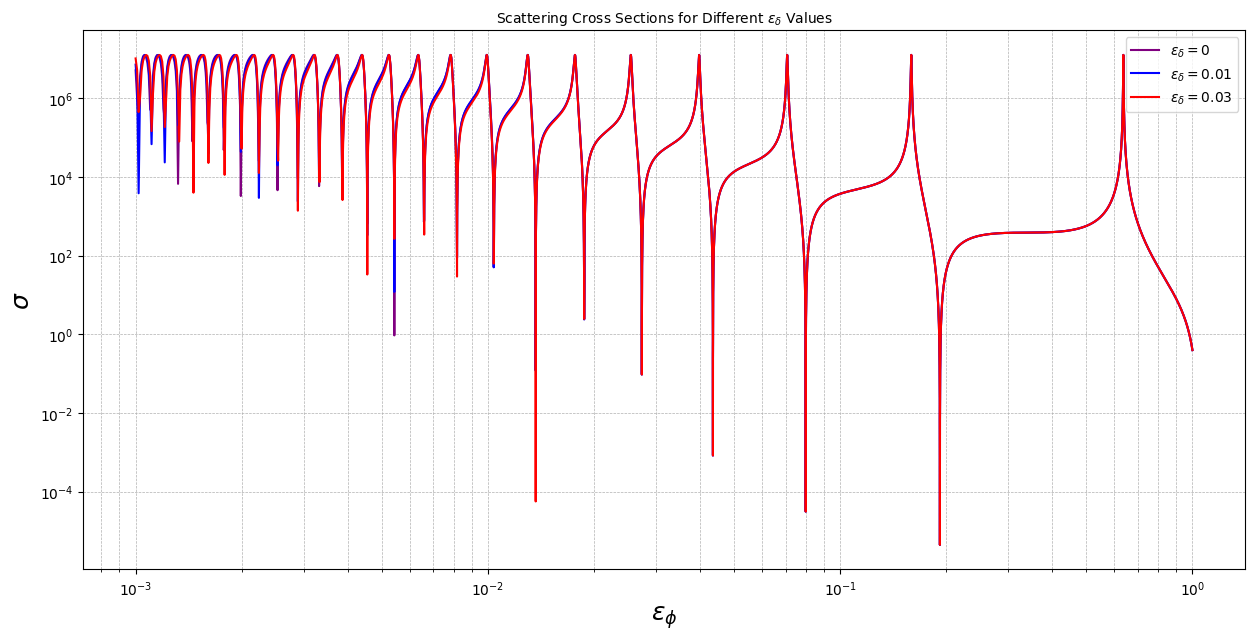
*Figure 5: Graph based on Equation 3.22. Purple is 0, blue is 0.1, and red is 0.3.*




# 3: So what? (What does it mean?)
## Describe your results

The results currently do not match the ones in the paper. The expected figures are below:
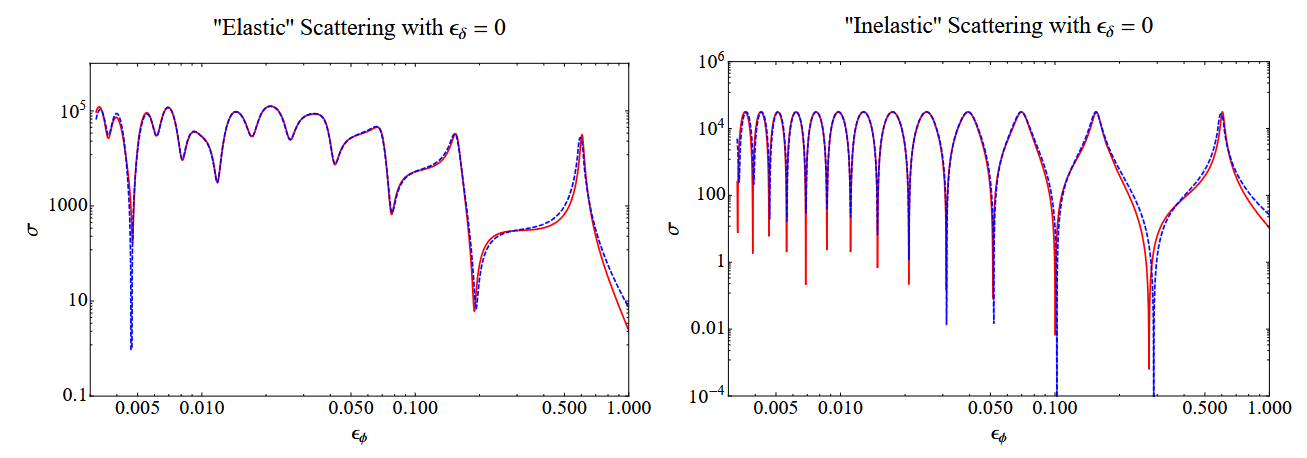

*Figure 6: Expected outcome for Equation 3.10 and 3.12 graphs above*

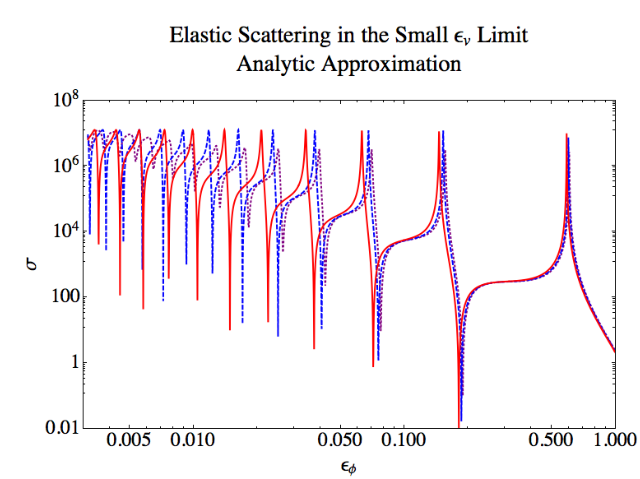

*Figure 7: Expected outcome for Equation 3.22 graph above*

The overall shape is close, but there is still a small discrepancy in the number of oscillations in Figure 6, and there are too many overlaps between the different values in Figure 7. This means there may be a discrepancy in the code that I will need to find, however, overall my code does work for what we need right now. 

 <span style="color: red;"> Very descriptive and explained well. Good job.  </span>

# 4. Now what? (What's next?)
## Plan for the next week

- I will go through the code again to check and see if there is a possibility that certain functions are causing the extra oscillations
- I will use this code and generate values for the cross sections, and compare the generated values with my lab partner's numerical solutions
- We will converge with the sim team and run dark matter simulations based on the numerical cross sections, then use the corss sections to simulate cold dark matter halo behaviour

 <span style="color: red;"> Good. </span>

# 5. Bibliography

[1] K. Schutz and T. R. Slatyer, “Self-scattering for Dark Matter with an excited state,” Journal of Cosmology and Astroparticle Physics, vol. 2015, no. 01, pp. 021–021, Jan. 2015, doi: https://doi.org/10.1088/1475-7516/2015/01/021.

| Category       | Points      |
| ------------- |:------------:|
| Formatting    |       2       |
| Experience    |       2       |
| What?         |       2       |
| So what?      |       4       |
| Now what?     |       4       |
| Bibliography  |       3       |
| Style         |       3       |
| Total         |       20      |